### reads in the BAA, convert to 0 to 360, do the same for the masks, combine and extract Pacific domain

In [47]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [48]:
import salem
import fiona

In [49]:
from collections import OrderedDict as OD

In [51]:
from glob import glob

### dictionnary mapping the sanitized country names (no spaces of funny stuff) to the 'real' names

In [52]:
def sanitize(x): 
    x = x.replace(" ","_")
    x = x.replace("/","")
    x = x.replace(":","")
    return x

In [53]:
dict_names = OD()

In [54]:
dict_names['Palau'] = 'Palau'
dict_names['Federated_States_of_Micronesia'] = 'FSM'
dict_names['Guam'] = 'Guam'
dict_names['Northern_Marianas'] = 'Northern Marianas'
dict_names['Marshall_Islands'] = 'Marshall Islands'
dict_names['Nauru'] = 'Nauru'
dict_names['Kiribati_Gilbert_Islands'] = 'Kiribati (Gilbert)'
dict_names['Kiribati_Phoenix_Islands'] = 'Kiribati (Phoenix)'
dict_names['Kiribati_Line_Islands'] = 'Kiribati (Line)'
dict_names['Papua_New_Guinea'] = 'Papua New Guinea'
dict_names['Solomon_Islands'] = 'Solomon Islands'
dict_names['New_Caledonia'] = 'New Caledonia'
dict_names['Vanuatu_North'] = 'Vanuatu North'
dict_names['Vanuatu_South'] = 'Vanuatu South'
dict_names['Fiji'] = 'Fiji'
dict_names['Tuvalu'] = 'Tuvalu'
dict_names['Wallis_&_Futuna'] = 'Wallis & Futuna'
dict_names['Tokelau'] = 'Tokelau'
dict_names['Tonga'] = 'Tonga'
dict_names['Samoa'] = 'Samoa'
dict_names['American_Samoa'] = 'American Samoa'
dict_names['Niue'] = 'Niue'
dict_names['Northern_Cook_Islands'] = 'Northern Cook Islands'
dict_names['Southern_Cook_Islands'] = 'Southern Cook Islands'
dict_names['Society_Islands'] = 'Society Islands'
dict_names['Austral_Islands'] = 'Austral Islands'
dict_names['Tuamotu__Gambier_Islands'] = 'Tuamotu/Gambier'
dict_names['Marquesas'] = 'Marquesas'
dict_names['Pitcairn_Islands'] = 'Pitcairn Islands'

In [55]:
country_names = list(dict_names.keys())

In [56]:
country_names

['Palau',
 'Federated_States_of_Micronesia',
 'Guam',
 'Northern_Marianas',
 'Marshall_Islands',
 'Nauru',
 'Kiribati_Gilbert_Islands',
 'Kiribati_Phoenix_Islands',
 'Kiribati_Line_Islands',
 'Papua_New_Guinea',
 'Solomon_Islands',
 'New_Caledonia',
 'Vanuatu_North',
 'Vanuatu_South',
 'Fiji',
 'Tuvalu',
 'Wallis_&_Futuna',
 'Tokelau',
 'Tonga',
 'Samoa',
 'American_Samoa',
 'Niue',
 'Northern_Cook_Islands',
 'Southern_Cook_Islands',
 'Society_Islands',
 'Austral_Islands',
 'Tuamotu__Gambier_Islands',
 'Marquesas',
 'Pitcairn_Islands']

### reads the past month observed 7d max BAA, 7 days chunks 

In [57]:
yearmonth = '201707'

In [58]:
dpath = '/Volumes/GDATA/data/CRW/BAA7dMAX/retrospective/{}'.format(yearmonth)

In [59]:
if not os.path.exists('../outputs/{}'.format(yearmonth)): 
    os.mkdir('../outputs/{}'.format(yearmonth))

In [60]:
lfiles = glob(os.path.join(dpath, 'b5km_baa-max-7d_*.nc'))

In [61]:
lfiles.sort()

In [62]:
lfiles

['/Volumes/GDATA/data/CRW/BAA7dMAX/retrospective/201707/b5km_baa-max-7d_20170710.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/retrospective/201707/b5km_baa-max-7d_20170717.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/retrospective/201707/b5km_baa-max-7d_20170724.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/retrospective/201707/b5km_baa-max-7d_20170731.nc']

### reads in the BAA 7 days max for the past 4 weeks

In [16]:
BAA = xr.open_mfdataset(lfiles)

In [17]:
BAA

<xarray.Dataset>
Dimensions:        (lat: 3600, lon: 7200, time: 4)
Coordinates:
  * lat            (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
  * lon            (lon) float32 -179.975 -179.925 -179.875 -179.825 ...
  * time           (time) datetime64[ns] 2017-12-10T12:00:00 ...
Data variables:
    surface_flag   (time, lat, lon) int8 dask.array<shape=(4, 3600, 7200), chunksize=(1, 3600, 7200)>
    CRW_BAA_max7d  (time, lat, lon) float64 dask.array<shape=(4, 3600, 7200), chunksize=(1, 3600, 7200)>
    crs            (time) int16 -32767 -32767 -32767 -32767
Attributes:
    Conventions:                CF-1.6, ACDD-1.3, Unidata Observation Dataset...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    title:                      NOAA Coral Reef Watch Daily Global 5-km Satel...
    summary:                    This is a product of NOAA Coral Reef Watch da...
    references:                 Liu, G, Heron SF, Eakin CM, Muller-Karger FE,...
    institution:    

In [18]:
last_date = BAA.time[-1].data.astype('M8[D]').astype('O')

### calculates the max over the past 4 weeks 

In [19]:
BAA = BAA.max('time')

In [20]:
BAA

<xarray.Dataset>
Dimensions:        (lat: 3600, lon: 7200)
Coordinates:
  * lat            (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
  * lon            (lon) float32 -179.975 -179.925 -179.875 -179.825 ...
Data variables:
    surface_flag   (lat, lon) int8 dask.array<shape=(3600, 7200), chunksize=(3600, 7200)>
    CRW_BAA_max7d  (lat, lon) float64 dask.array<shape=(3600, 7200), chunksize=(3600, 7200)>
    crs            int16 -32767

### goes from 0 to 360 

In [21]:
BAA = BAA.assign_coords(lon=(BAA.lon % 360)).roll(lon=(BAA.dims['lon'] // 2))

### selects the Pacific region

In [22]:
BAA = BAA.sel(lon=slice(100, 300), lat=slice(50, -50))

/Users/nicolasf/anaconda3/envs/IOOS/lib/python3.5/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/nicolasf/anaconda3/envs/IOOS/lib/python3.5/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


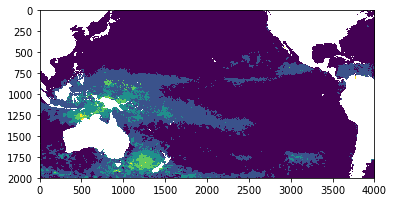

In [23]:
plt.imshow(BAA['CRW_BAA_max7d'].data)

### loads in memory

In [24]:
BAA.load()

/Users/nicolasf/anaconda3/envs/IOOS/lib/python3.5/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/nicolasf/anaconda3/envs/IOOS/lib/python3.5/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 4000)
Coordinates:
  * lat            (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 ...
  * lon            (lon) float32 100.025 100.075 100.125 100.175 100.225 ...
Data variables:
    surface_flag   (lat, lon) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    CRW_BAA_max7d  (lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    crs            int16 -32767

### reads in the masks

In [25]:
combined_reef_mask = xr.open_dataset('../data/combined_reef_mask.nc')

In [26]:
combined_reef_mask

<xarray.Dataset>
Dimensions:  (lat: 2000, lon: 4000)
Coordinates:
  * lat      (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 49.675 ...
  * lon      (lon) float32 100.025 100.075 100.125 100.175 100.225 100.275 ...
Data variables:
    mask     (lat, lon) float32 ...

In [27]:
mask_data = combined_reef_mask.mask.data

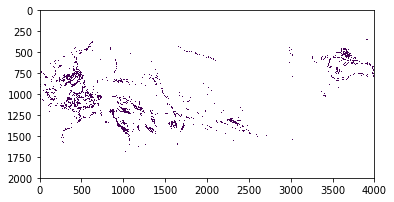

In [28]:
plt.imshow(mask_data)

In [29]:
BAA['reef_mask'] = (('lat','lon'), mask_data)

In [30]:
BAA

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 4000)
Coordinates:
  * lat            (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 ...
  * lon            (lon) float32 100.025 100.075 100.125 100.175 100.225 ...
Data variables:
    surface_flag   (lat, lon) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    CRW_BAA_max7d  (lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    crs            int16 -32767
    reef_mask      (lat, lon) float32 nan nan nan nan nan nan nan nan nan ...

### saves in netcdf, with the mask

In [31]:
BAA.to_netcdf(os.path.join(dpath, 'baa-max-7d_to_{:%Y-%m-%d}.nc'.format(last_date)))

In [32]:
BAA.close()

In [33]:
dset_salem = salem.open_xr_dataset(os.path.join(dpath, 'baa-max-7d_to_{:%Y-%m-%d}.nc'.format(last_date)))

In [34]:
dset_salem

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 4000)
Coordinates:
  * lat            (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 ...
  * lon            (lon) float32 100.025 100.075 100.125 100.175 100.225 ...
Data variables:
    surface_flag   (lat, lon) int8 ...
    CRW_BAA_max7d  (lat, lon) float64 ...
    crs            int16 ...
    reef_mask      (lat, lon) float32 ...
Attributes:
    pyproj_srs:  +units=m +datum=WGS84 +proj=latlong 

In [35]:
for country_name in country_names: 
#     sh_country = shp.query("COUNTRYNAM == '{}'".format(country_name))
#     sh_country.to_file('../shapefiles/shapes_{}'.format(country_name))
#     sh_country = fiona.open('../shapefiles/shapes_{}'.format(country_name))
#     convert_shape(country_name)
    sh_country = salem.read_shapefile('../shapefiles/shapes_{}_converted.shp'.format(country_name))
    ds_subset = dset_salem.salem.subset(shape=sh_country, margin=2)
    ds_subset_roi = ds_subset.salem.roi(shape=sh_country)
    masked_roi = ds_subset_roi['CRW_BAA_max7d'] * ds_subset_roi['reef_mask']
    masked_roi = masked_roi.stack(z=('lat','lon'))
    df = masked_roi.to_dataframe(name='masked_roi')
    df_na = df.dropna()
    summary  = df_na.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9])
    summary = summary.T
    counts = pd.value_counts(df_na.iloc[:,0])
    counts = counts.reindex(range(5))
    counts = counts.replace(np.nan, 0)
    counts = counts.to_frame().T
    summary = pd.concat([summary, counts], axis=1)
    summary.index.name = "country"
    summary.index = [country_name]
    summary.to_csv('../outputs/{}/{}_summary.csv'.format(yearmonth, country_name))

In [36]:
lfiles = glob("../outputs/{}/*_summary.csv".format(yearmonth))

In [37]:
len(lfiles)

29

In [38]:
dl = [] 
for f in lfiles: 
    d = pd.read_csv(f, index_col=0)
    dl.append(d)

In [39]:
dlf = pd.concat(dl, axis=0)

In [40]:
dlf = dlf.reindex(country_names)

In [41]:
dlf.index = [dict_names[x] for x in dlf.index]

In [42]:
dlf

,count,mean,std,min,10%,25%,50%,60%,70%,80%,90%,max,0,1,2,3,4
Palau,803.0,1.057285,0.232532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,757.0,46.0,0.0,0.0
FSM,5229.0,1.148977,0.498073,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,4767.0,145.0,317.0,0.0
Guam,278.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,278.0,0.0,0.0,0.0
Northern Marianas,828.0,0.105072,0.306832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,741.0,87.0,0.0,0.0,0.0
Marshall Islands,3796.0,0.959431,0.197316,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,154.0,3642.0,0.0,0.0,0.0
Nauru,66.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,66.0,0.0,0.0,0.0
Kiribati (Gilbert),1500.0,0.398667,0.489787,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,902.0,598.0,0.0,0.0,0.0
Kiribati (Phoenix),612.0,0.369281,0.483005,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,386.0,226.0,0.0,0.0,0.0
Kiribati (Line),726.0,0.012397,0.110724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,717.0,9.0,0.0,0.0,0.0
Papua New Guinea,12824.0,1.786962,0.625436,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0,4165.0,7226.0,1433.0,0.0


In [43]:
dlf.to_csv('../outputs/{}/BAA_4weeks_max_summary.csv'.format(yearmonth))

In [44]:
dlf.sort_values("90%", ascending=False)

,count,mean,std,min,10%,25%,50%,60%,70%,80%,90%,max,0,1,2,3,4
Papua New Guinea,12824.0,1.786962,0.625436,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0,4165.0,7226.0,1433.0,0.0
Solomon Islands,6016.0,1.163398,0.369759,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,5033.0,983.0,0.0,0.0
Palau,803.0,1.057285,0.232532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,757.0,46.0,0.0,0.0
FSM,5229.0,1.148977,0.498073,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,4767.0,145.0,317.0,0.0
Tuamotu/Gambier,6949.0,0.758095,0.428268,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1681.0,5268.0,0.0,0.0,0.0
Society Islands,1337.0,1.010471,0.121903,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1317.0,17.0,0.0,0.0
Southern Cook Islands,678.0,0.228614,0.420250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,523.0,155.0,0.0,0.0,0.0
Northern Cook Islands,476.0,0.745798,0.435870,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,121.0,355.0,0.0,0.0,0.0
American Samoa,331.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,331.0,0.0,0.0,0.0
Samoa,395.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,395.0,0.0,0.0,0.0


In [45]:
combined_reef_mask.close()

In [46]:
dset_salem.close() 